In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import AllTogether as t
import seaborn as sns
%matplotlib inline

In [2]:
#read in dataset and have a quick oversight
df_seattle = pd.read_csv("Airbnb_Seattle_listings.csv")
df_seattle.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
#read in dataset and have a quick oversight
df_boston = pd.read_csv("Airbnb_Boston_listings.csv")
df_boston.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [4]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [5]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

In [6]:
def host_correlation(df):
    """
    Cleans a pandasdataframe so that it only keeps variables starting with host and the price.
    This function also encodes all categorial variables and cleans all necessary parts so all columns can be handled as numeric

    Parameters:
    df : A pandas dataframe

    Returns: 
    df_filtered: Cleaned Pandas Dataframe
    """
    # only keep the price and all host related variables 
    prefixes = ['host_', 'price']
    filtered_columns = [col for col in df.columns if col.startswith(tuple(prefixes))]
    df_filtered = df[filtered_columns]
    
    # Encode the host_verifications columns with dummy variables after splitting up the strings 
    df_filtered['host_verifications'] = df_filtered['host_verifications'].str.replace(r"[\[\]' ]", '', regex=True)
    dummy_df = df_filtered['host_verifications'].str.get_dummies(sep=',')
    dummy_df = dummy_df.add_prefix('verification_')
    df_filtered = df_filtered.join(dummy_df)
    df_filtered = df_filtered.drop('host_verifications', axis=1)   
    
    #encode the response time to dummy variables as before
    dummy_df_response_time = df_filtered['host_response_time'].str.get_dummies()
    dummy_df_response_time = dummy_df_response_time.add_prefix('resp_time_')
    df_filtered = df_filtered.join(dummy_df_response_time)
    df_filtered = df_filtered.drop('host_response_time', axis=1)
    
    # Encode all Boolean variables to 1 and 0 istead of true and false
    bool_columns=['host_is_superhost', 'host_has_profile_pic','host_identity_verified']
    for col in bool_columns:
        df_filtered[col] = df_filtered[col].map({'t': 1, 'f': 0})
        
    #convert columns with % and $ to float
    df_filtered['host_response_rate'] = df_filtered['host_response_rate'].str.rstrip('%').astype(float)
    df_filtered['host_acceptance_rate'] = df_filtered['host_acceptance_rate'].str.rstrip('%').astype(float) 
    df_filtered['price'] = df_filtered['price'].replace('[\$,]', '', regex=True).astype(float)
    
    #Function to encode wether host lives in state or not
    def encode_location(location):
        if pd.isna(location):
            return 0
        return 1 if 'Washington, United States' in location else 0
    
    # Apply the function to the 'location' column
    df_filtered['host_in_state'] = df_filtered['host_location'].apply(encode_location)
    df_filtered=df_filtered.drop(['host_location'], axis=1)
    
    # From host_since calculate how many months the user is already a host. Reference data is January 2017 since both df got last scraped in 2016    
    df_filtered['host_since'] = pd.to_datetime(df_filtered['host_since'], format='%Y-%m-%d')
    reference_date = pd.to_datetime('2017-01-01', format='%Y-%m-%d')
    df_filtered['host_since_months'] = df_filtered['host_since'].apply(lambda x: (reference_date.year - x.year) * 12 + reference_date.month - x.month)
    df_filtered=df_filtered.drop(['host_since'], axis=1)   
    
    #drop unnecessary columns with urls and the host id
    #drop host_neighborhood and host_about because they have two many features to encode and will propably have no impact on the price
    df_filtered=df_filtered.drop(['host_id','host_url', 'host_name', 'host_thumbnail_url', 'host_picture_url', 'host_about', 'host_neighbourhood'], axis=1)
    

    return df_filtered

In [7]:
def plot_correlation(df,base,color):
    """
    Creates a correlation plot with seaborn for a given base value

    Parameters:
    df : A pandas dataframe
    base: value to which the correlation should be examined
    color: colorbar to use 

    Returns: 
    """
    plt.figure(figsize=(8, 12))
    heatmap = sns.heatmap(df.corr()[[base]].sort_values(by=base, ascending=False), vmin=-1, vmax=1, annot=True, cmap=color)
    heatmap.set_title('Features Correlating with {}'.format(base), fontdict={'fontsize':18});

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


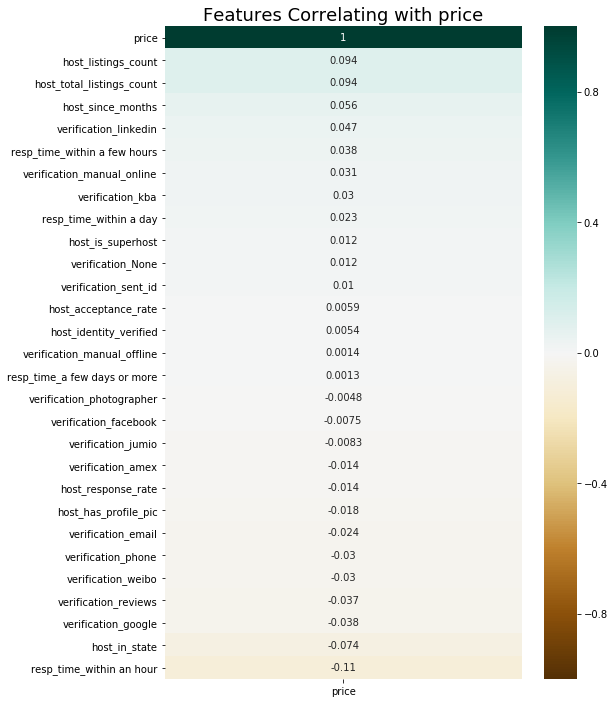

In [8]:
plot_correlation(host_correlation(df_seattle), 'price', 'BrBG')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


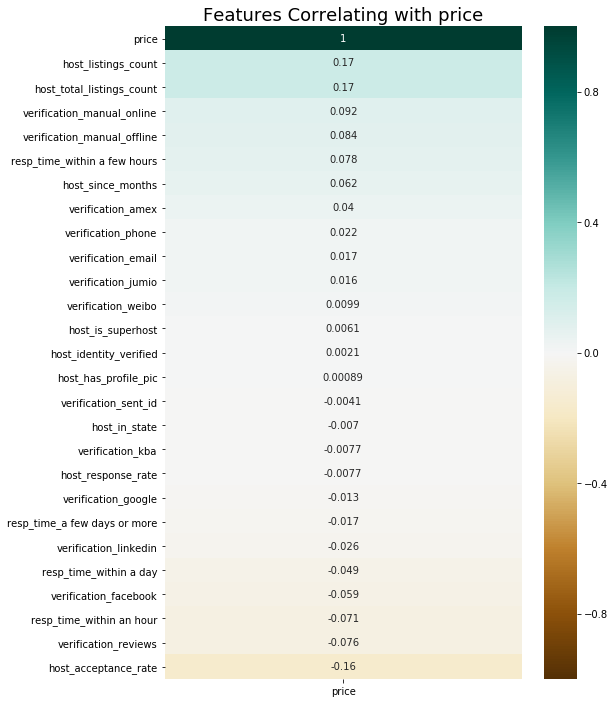

In [9]:
plot_correlation(host_correlation(df_boston), 'price', 'BrBG')

In [10]:
def plot_hosts_per_month(df):
    """
    Plots the number of new hosts per month over time

    Parameters:
    df : A pandas dataframe

    Returns:
    None 
    """
    #host_since has only two nan values so we drop them
    df.dropna(subset=['host_since'], inplace=True)
    
    # Change host_since column to datetime format and extract the year and month
    df['host_since'] = pd.to_datetime(df['host_since'], format='%Y-%m-%d')
    df['year_month'] = df['host_since'].dt.to_period('M')

    # Group by host_id and year_month to count the number of hosts per month
    monthly_counts = df.groupby(['year_month', 'host_id']).size().reset_index(name='count')
    monthly_counts = monthly_counts.groupby('year_month')['count'].sum().reset_index()

    # Convert year_month back to a datetime for plotting
    monthly_counts['year_month'] = monthly_counts['year_month'].dt.to_timestamp()

    # Plot the bar diagram
    plt.figure(figsize=(10, 6))
    plt.bar(monthly_counts['year_month'], monthly_counts['count'], width=20, align='center')

    # Set ticks so it only shows the year on the x-axis for better readability
    years = monthly_counts['year_month'].dt.year.unique()
    year_ticks = [pd.Timestamp(year=year, month=1, day=1) for year in years]
    plt.xticks(year_ticks, [str(year) for year in years])

    plt.xlabel('Year')
    plt.ylabel('Number of new hosts')
    plt.title('Number of new hosts per month')
    plt.grid(True)
    plt.show()

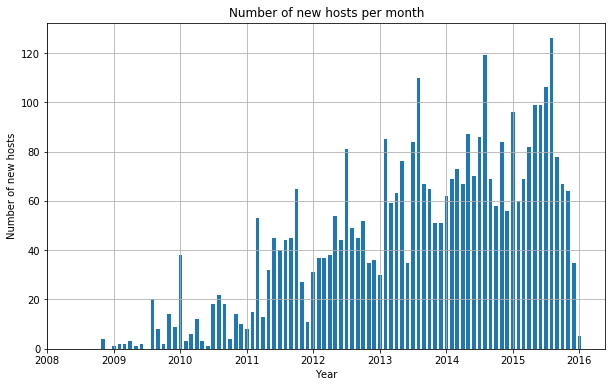

In [11]:
plot_hosts_per_month(df_seattle)

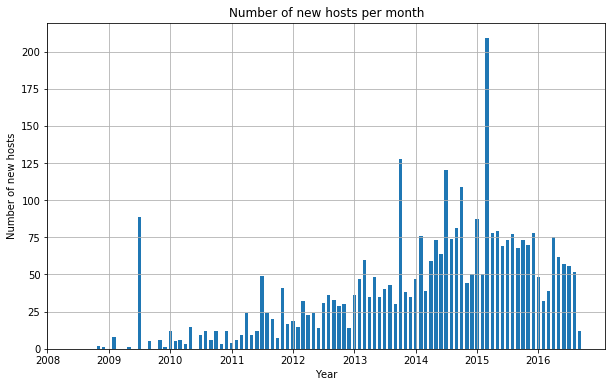

In [12]:
plot_hosts_per_month(df_boston)

In [13]:
def reviews_correlation(df):
    df_reviews=host_correlation(df)
#df_reviews['score_reviews'] = df['reviews_per_month'] * df['review_scores_rating'] / 10
    df_reviews['score_reviews'] = df['review_scores_rating']
    df_reviews['score_reviews'].fillna(0, inplace = True)
    return df_reviews

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


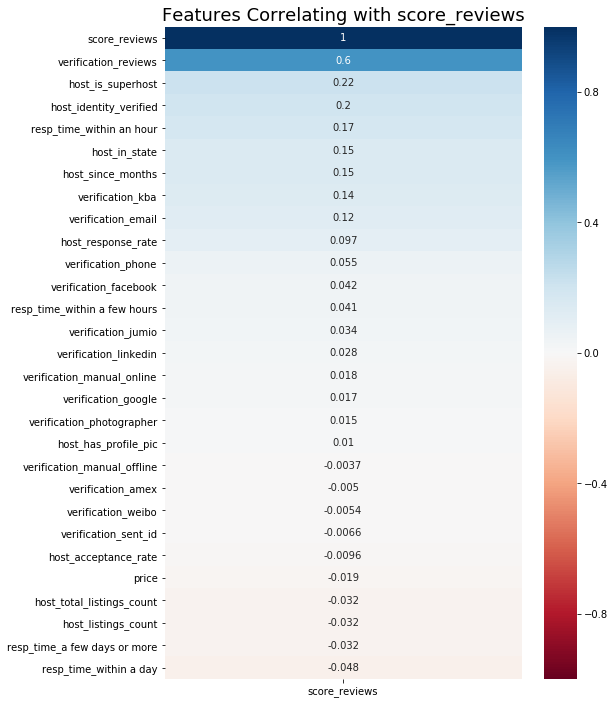

In [14]:
plot_correlation(reviews_correlation(df_seattle), 'score_reviews', 'RdBu')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


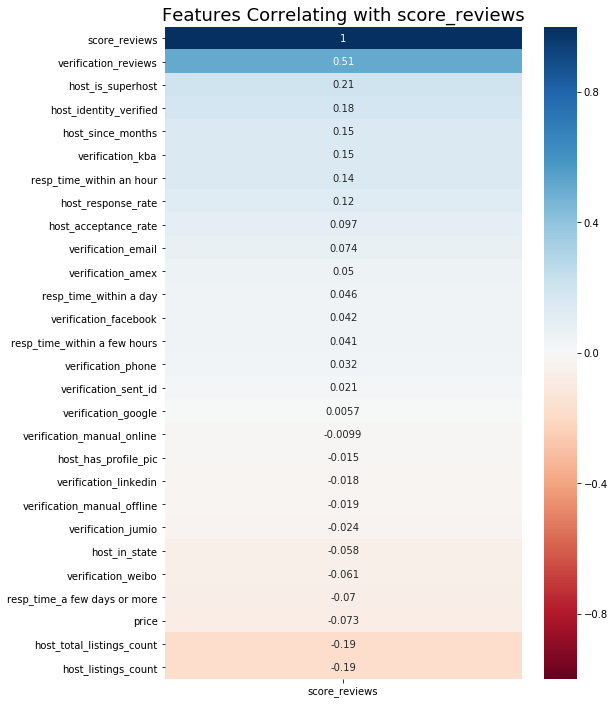

In [15]:
plot_correlation(reviews_correlation(df_boston), 'score_reviews', 'RdBu')

In [16]:
# from here on just additional code for interesting correlations

In [17]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3816 entries, 0 to 3817
Data columns (total 93 columns):
id                                  3816 non-null int64
listing_url                         3816 non-null object
scrape_id                           3816 non-null int64
last_scraped                        3816 non-null object
name                                3816 non-null object
summary                             3639 non-null object
space                               3248 non-null object
description                         3816 non-null object
experiences_offered                 3816 non-null object
neighborhood_overview               2785 non-null object
notes                               2211 non-null object
transit                             2883 non-null object
thumbnail_url                       3496 non-null object
medium_url                          3496 non-null object
picture_url                         3816 non-null object
xl_picture_url                      3496

In [18]:
prefixes = ['review_','last_review','first_review','number_of_reviews']
filtered_columns = [col for col in df_seattle.columns if col.startswith(tuple(prefixes))]
df_review=df_seattle[filtered_columns]

In [19]:
df_review.head()

,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0
1,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0
2,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,38,2012-07-10,2015-10-24,92.0,9.0,9.0,10.0,10.0,9.0,9.0


In [20]:
keep=['price','reviews_per_month','review_scores_rating','bedrooms']
df_price_review=df_seattle[keep]
df_price_review['price'] = df_price_review['price'].replace('[\$,]', '', regex=True).astype(float)
df_price_review['reviews_per_month'].fillna(0, inplace = True)
df_price_review['bedrooms'].fillna(0, inplace = True)
df_price_review['score_reviews'] = df_price_review['reviews_per_month'] * df_price_review['review_scores_rating'] / 10
df_price_review['score_reviews'].fillna(0, inplace = True)
df_price_review.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

,price,reviews_per_month,review_scores_rating,bedrooms,score_reviews
0,85.0,4.07,95.0,1.0,38.665
1,150.0,1.48,96.0,1.0,14.208
2,975.0,1.15,97.0,5.0,11.155
3,100.0,0.00,NaN,0.0,0.000
4,450.0,0.89,92.0,3.0,8.188


In [21]:
def split_dataframe_by_bedrooms(df):
    """
    Splits a dataframe df by the number of bedrooms and generates a dictionary 
    where keys are dataframe names and values are pandas dataframes.

    Parameters:
    df : A pandas dataframe

    Returns:
    dataframes: A dictionary where keys are dataframe names and values are pandas dataframes. 
    """
    # Create an empty dictionary to store the dataframes
    dataframes = {}
    unique_bedrooms = sorted(df['bedrooms'].unique())
    # Iterate over the unique values in the 'bedrooms' column
    for bedroom in unique_bedrooms:
        # Filter the dataframe and create a new dataframe for each unique value
        dataframes[f'bedroom_{int(bedroom)}'] = df[df['bedrooms'] == bedroom].reset_index(drop=True)

    return dataframes

In [22]:
price_review_bedroom=split_dataframe_by_bedrooms(df_price_review)

In [23]:
def plot_correlations(dataframes):
    """
    Generates seaborn correlation plots for each dataframe in a dictionary of dataframes.

    Parameters:
    dataframes (dict): A dictionary where keys are dataframe names and values are pandas dataframes.

    Returns:
    None
    """
    for key, df in dataframes.items():
        plt.figure(figsize=(10, 8))
        correlation_matrix = df.corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
        plt.title(f'Correlation Matrix for {key}')
        plt.show()

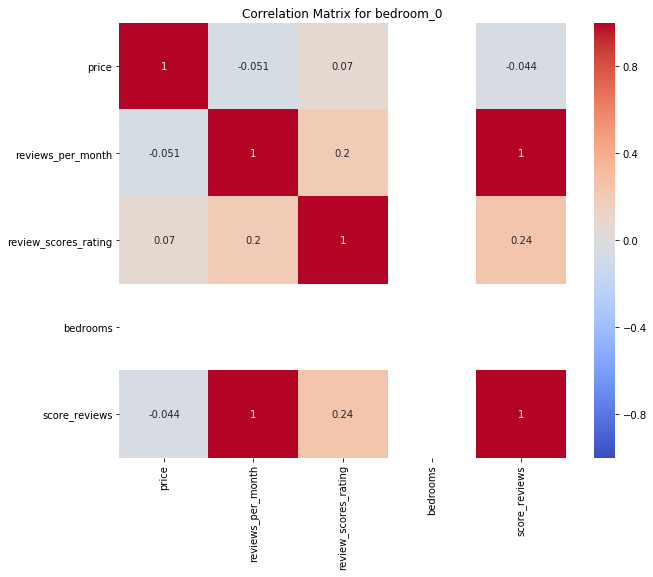

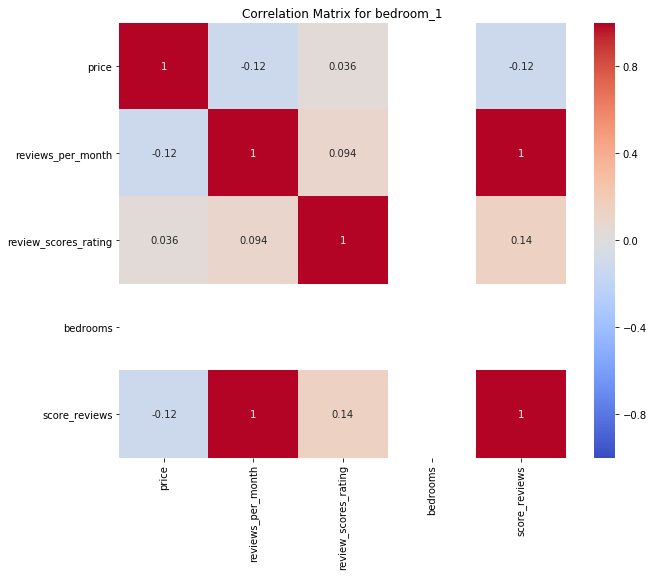

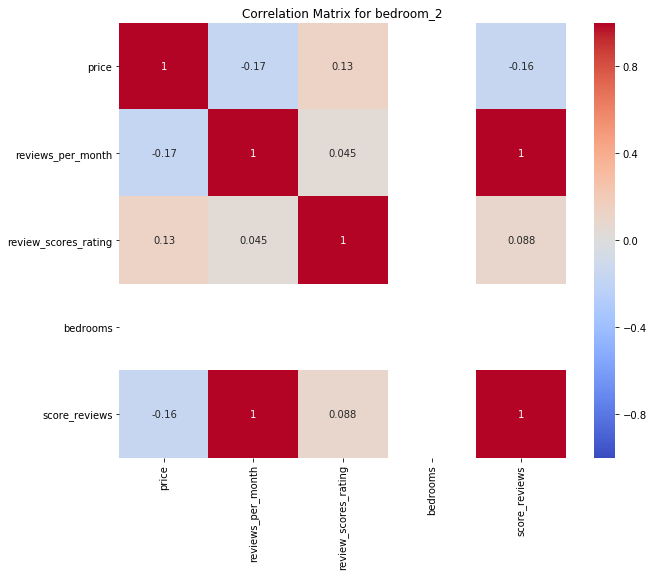

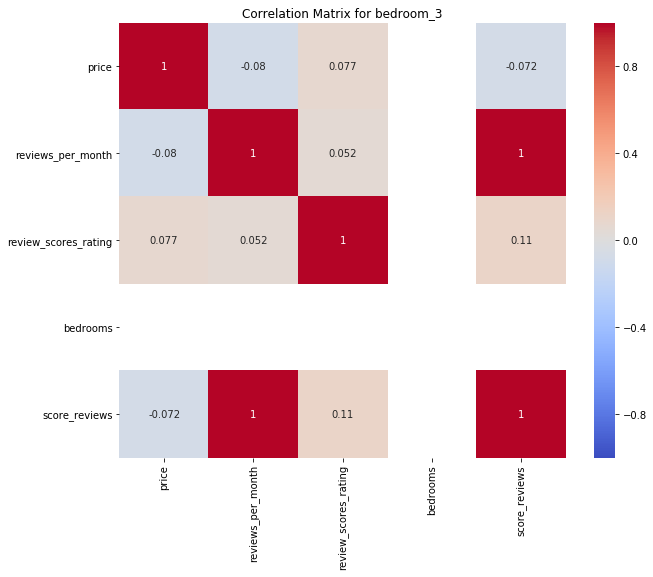

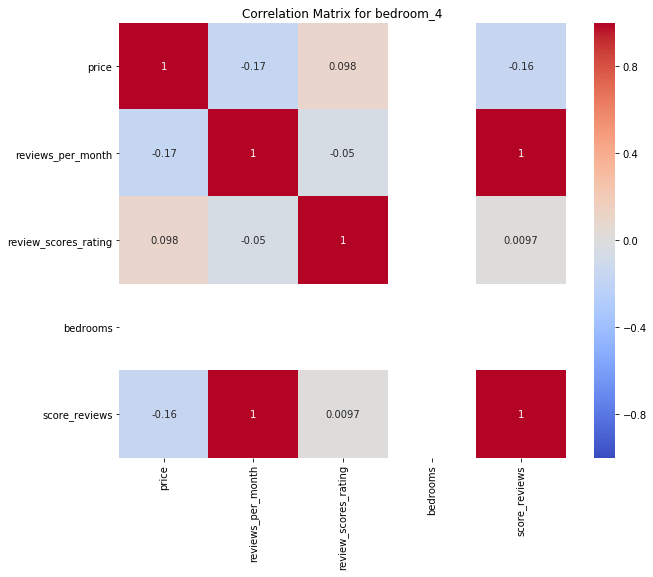

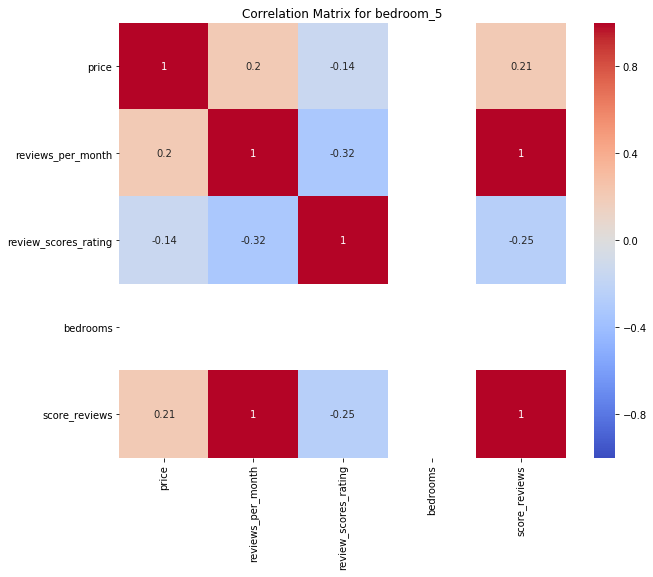

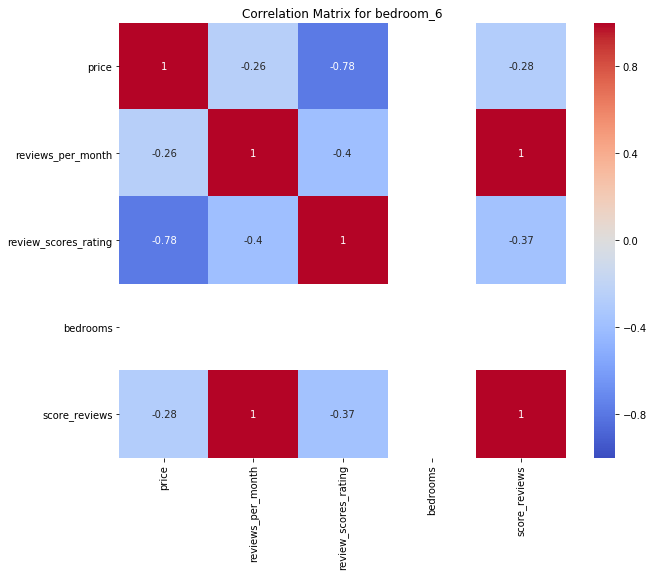

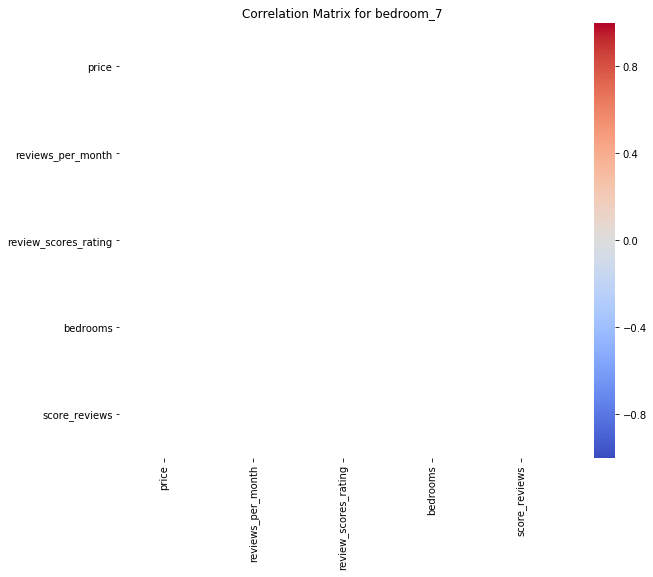

In [24]:
plot_correlations(price_review_bedroom)

In [25]:
def plot_scatter(dataframes, col_x, col_y):
    """
    Generates scatter plots for each dataframe in a dictionary of dataframes,
    plotting col_x vs. col_y.

    Parameters:
    dataframes (dict): A dictionary where keys are dataframe names and values are pandas dataframes.
    col_x (str): The column name to be plotted on the x-axis.
    col_y (str): The column name to be plotted on the y-axis.

    Returns:
    None
    """
    for name, df in dataframes.items():
        plt.figure()
        plt.scatter(df[col_x], df[col_y])
        plt.title(f"Scatter Plot: {name}")
        plt.xlabel(col_x)
        plt.ylabel(col_y)
        plt.show()

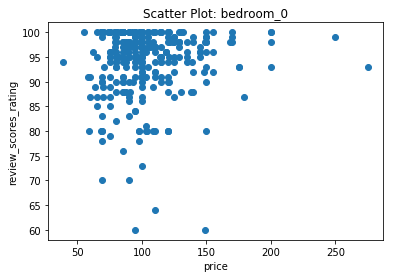

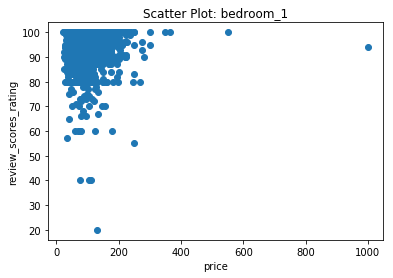

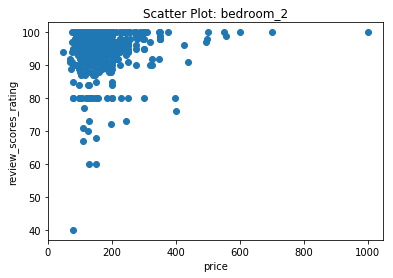

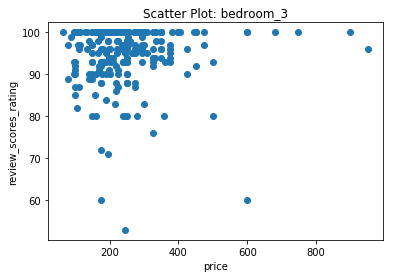

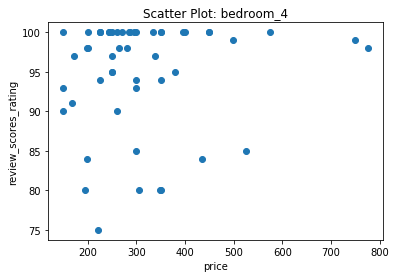

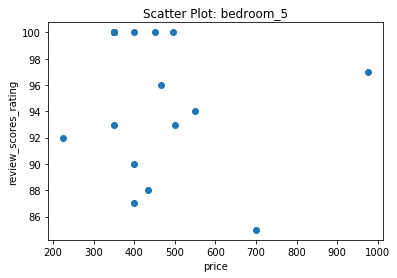

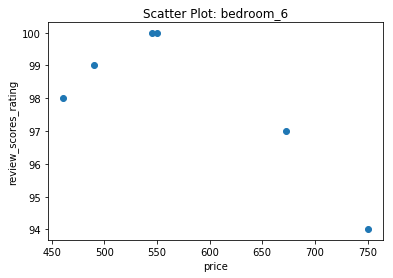

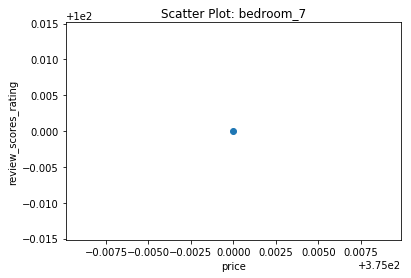

In [26]:
plot_scatter(price_review_bedroom, 'price', 'review_scores_rating')